In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet 
from statsmodels.tsa.seasonal import seasonal_decompose 
import numpy as np 

In [13]:
# Correct the path of the dataset 
data_path ='TSLA.csv' 
# load the data from the file
df =pd.read_csv(data_path) 

# display the first few rows  of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [14]:
# cheack the missing values 
missing_values =df.isnull().sum() 

# Basic statistical details 
statistics =df.describe() 

missing_values,statistics 

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
               Open         High          Low        Close    Adj Close  \
 count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
 mean    138.691296   141.771603   135.425953   138.762183   138.762183   
 std     250.044839   255.863239   243.774157   250.123115   250.123115   
 min       3.228000     3.326000     2.996000     3.160000     3.160000   
 25%      19.627000    20.402000    19.127500    19.615000    19.615000   
 50%      46.656999    47.487001    45.820002    46.545000    46.545000   
 75%      68.057001    69.357500    66.911501    68.103998    68.103998   
 max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   
 
              Volume  
 count  2.956000e+03  
 mean   3.131449e+07  
 std    2.798383e+07  
 min    5.925000e+05  
 25%    1.310288e+07  
 50%    2.488680e+07  
 75%    3.973875e+07  
 max    3.04

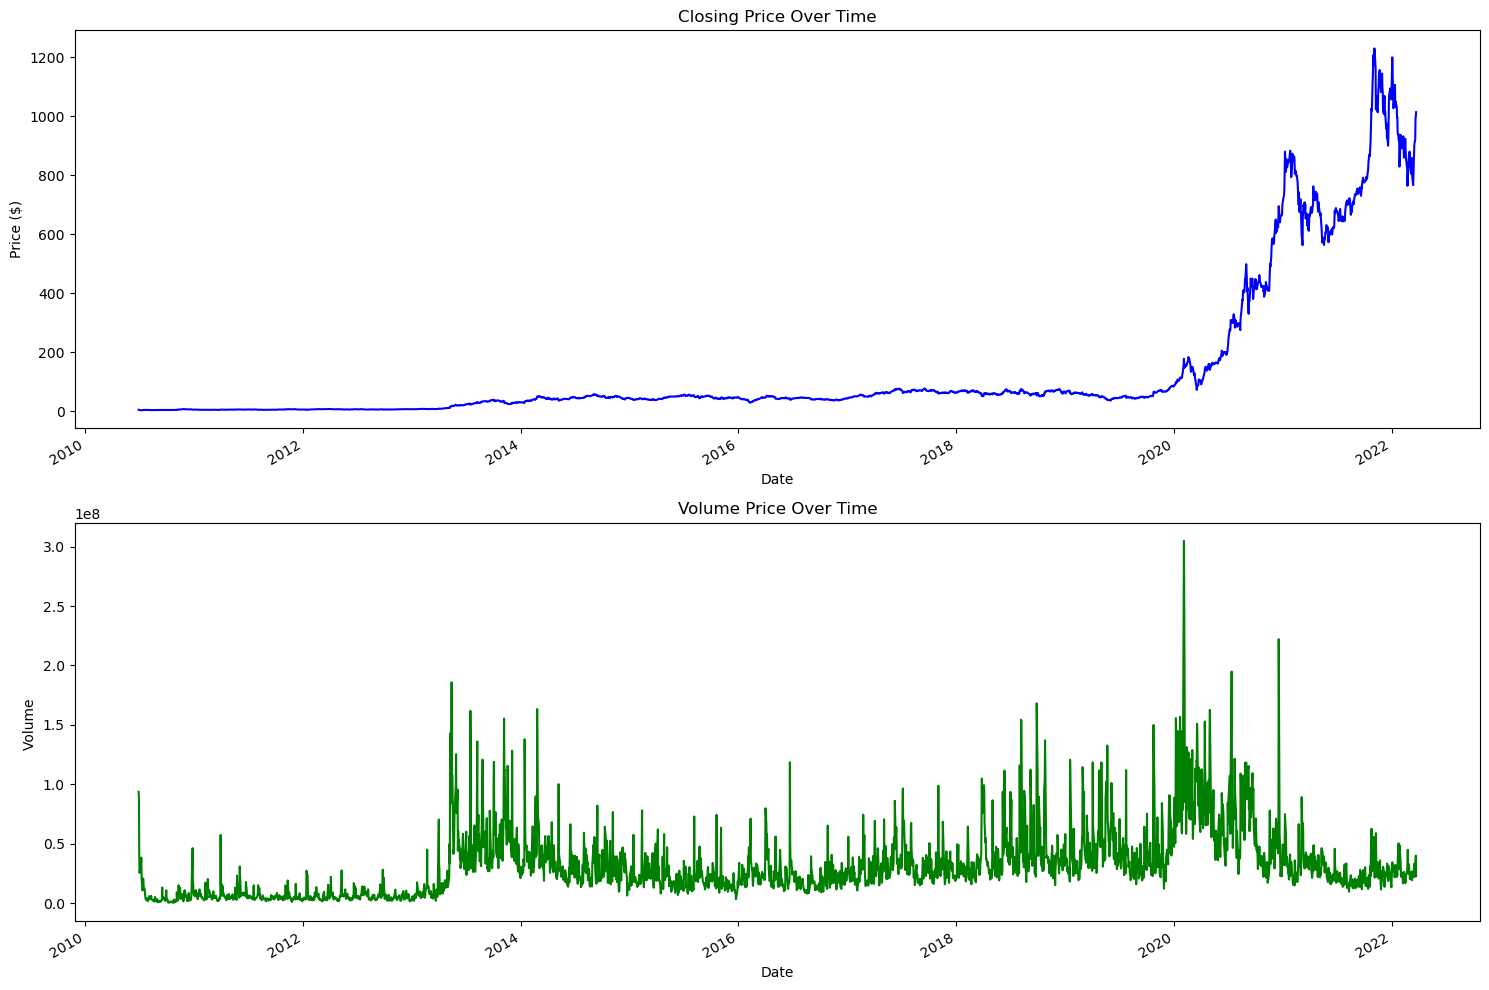

In [15]:
import matplotlib.pyplot as plt  

#convert the 'Date' columns to datetime format 
df['Date'] =pd.to_datetime(df['Date']) 

# set the date as the index of the DataFrame for plotting  
df.set_index('Date',inplace=True) 

#create a figure and a set of subplots  
fig,ax =plt.subplots(nrows=2,ncols=1,figsize=(15,10)) 

# Plot the closing prices over time 
df['Close'].plot(ax=ax[0],color='blue') 
ax[0].set_title('Closing Price Over Time') 
ax[0].set_ylabel('Price ($)') 

#Plot the trading volume over time 
df['Volume'].plot(ax=ax[1],color='green') 
ax[1].set_title('Volume Price Over Time') 
ax[1].set_ylabel('Volume ') 

#improve the layout 
plt.tight_layout() 
plt.show()

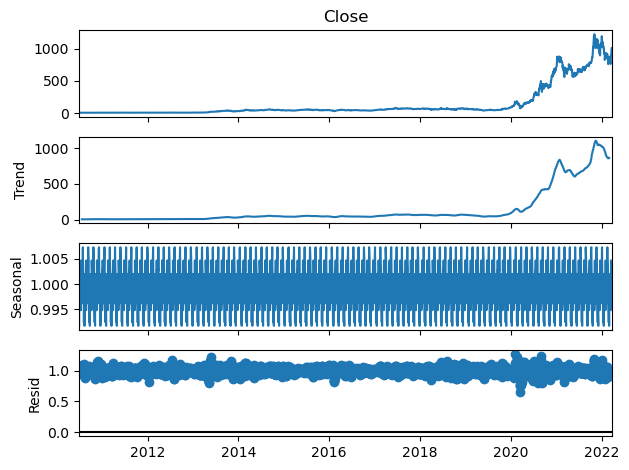

In [16]:
## Seasonality Analysis 
decomposition =seasonal_decompose(df['Close'],model='multiplicative',period=30) 
fig =decomposition.plot() 
plt.show()

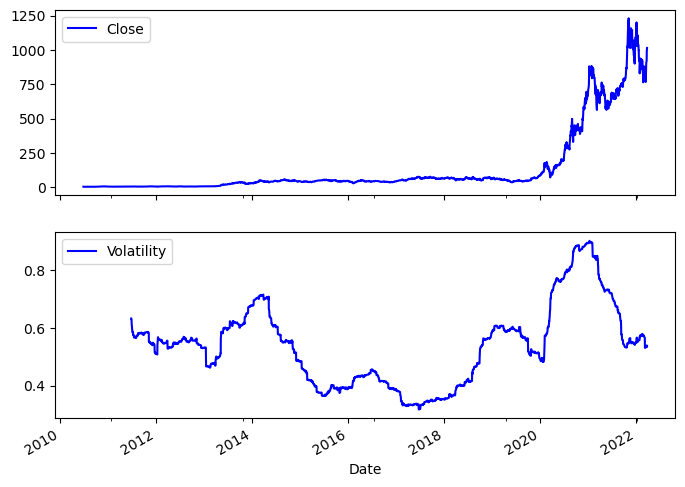

In [17]:
# Volatility Analysis 
df['Return'] = df['Close'].pct_change() 
df['Volatility'] =df['Return'].rolling (window=252).std()*np.sqrt(252) 
df[['Close','Volatility']].plot(subplots=True,color='blue',figsize=(8,6)) 
plt.show()

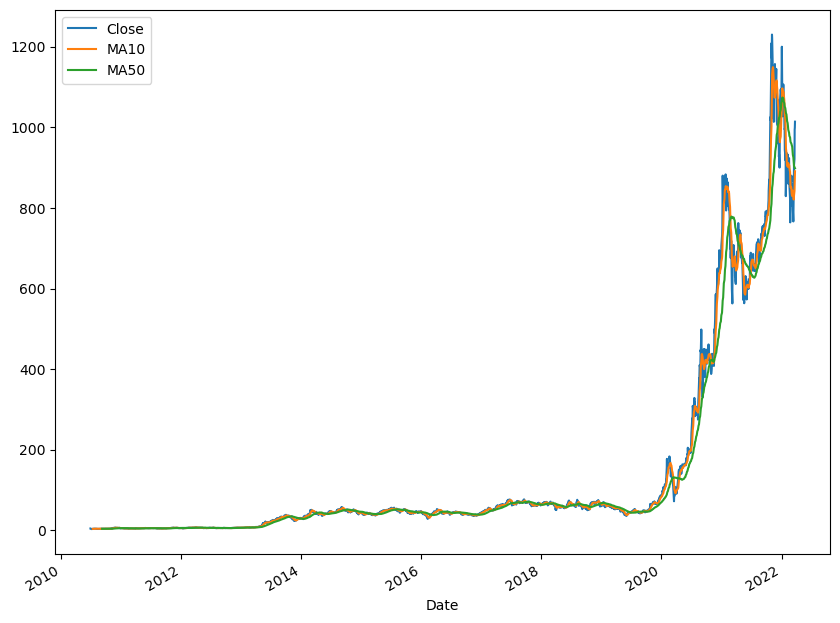

In [18]:
# Moving Average Analysis 
df['MA10'] =df['Close'].rolling(window=10).mean()
df['MA50'] =df['Close'].rolling(window=50).mean() 
df[['Close','MA10','MA50']].plot(label='Tesla',figsize=(10,8)) 
plt.show()

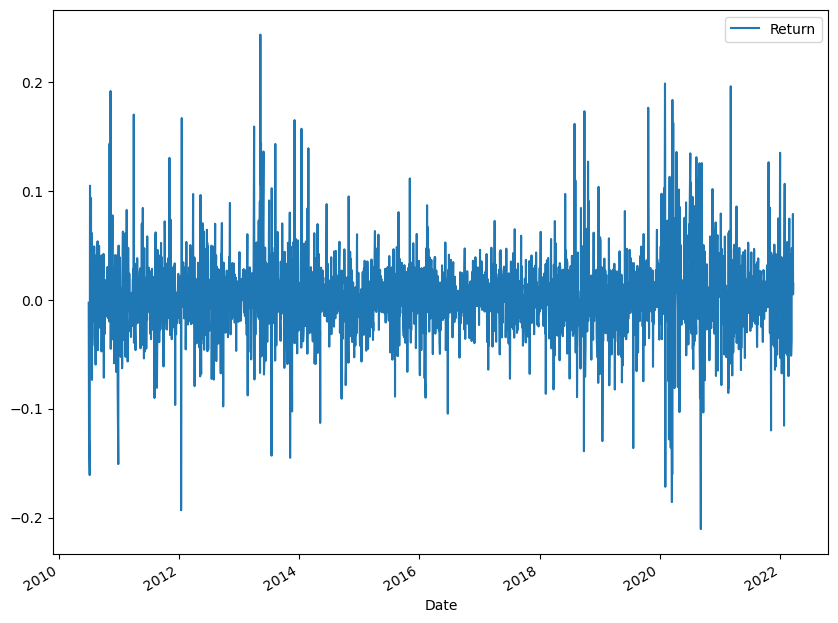

In [20]:
# Return Analysis 
df['Return'] = df['Close'].pct_change() 
df[['Return']].plot(label='Return',figsize=(10,8)) 
plt.show()

In [22]:
# Prepare the data for Prophet 
prophet_df =df.reset_index()[['Date','Close']] 
prophet_df.rename(columns={'Date':'ds','Close':'y'},inplace=True) 
prophet_df.head()

,ds,y
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


16:50:38 - cmdstanpy - INFO - Chain [1] start processing
16:50:39 - cmdstanpy - INFO - Chain [1] done processing


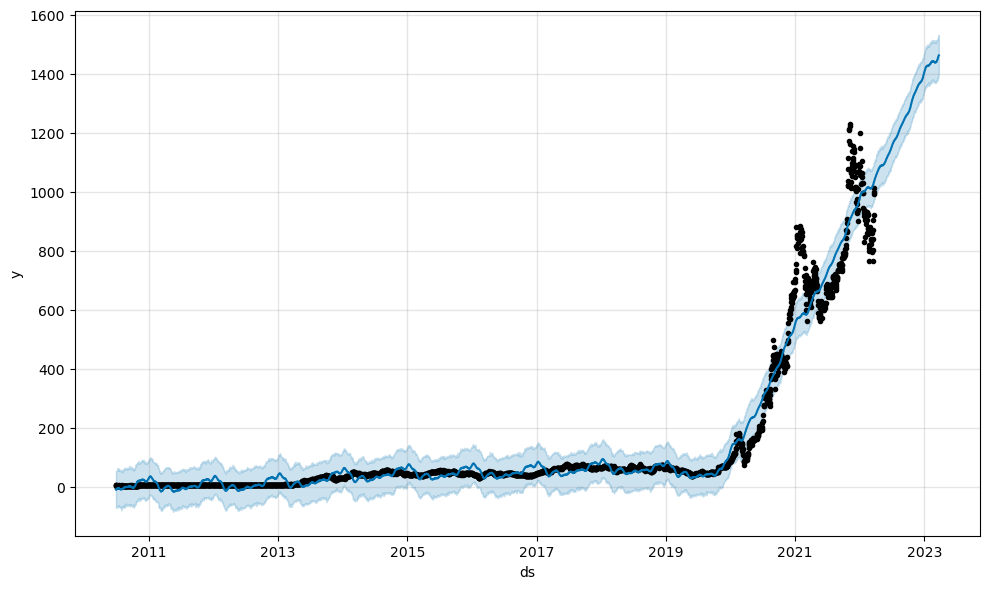

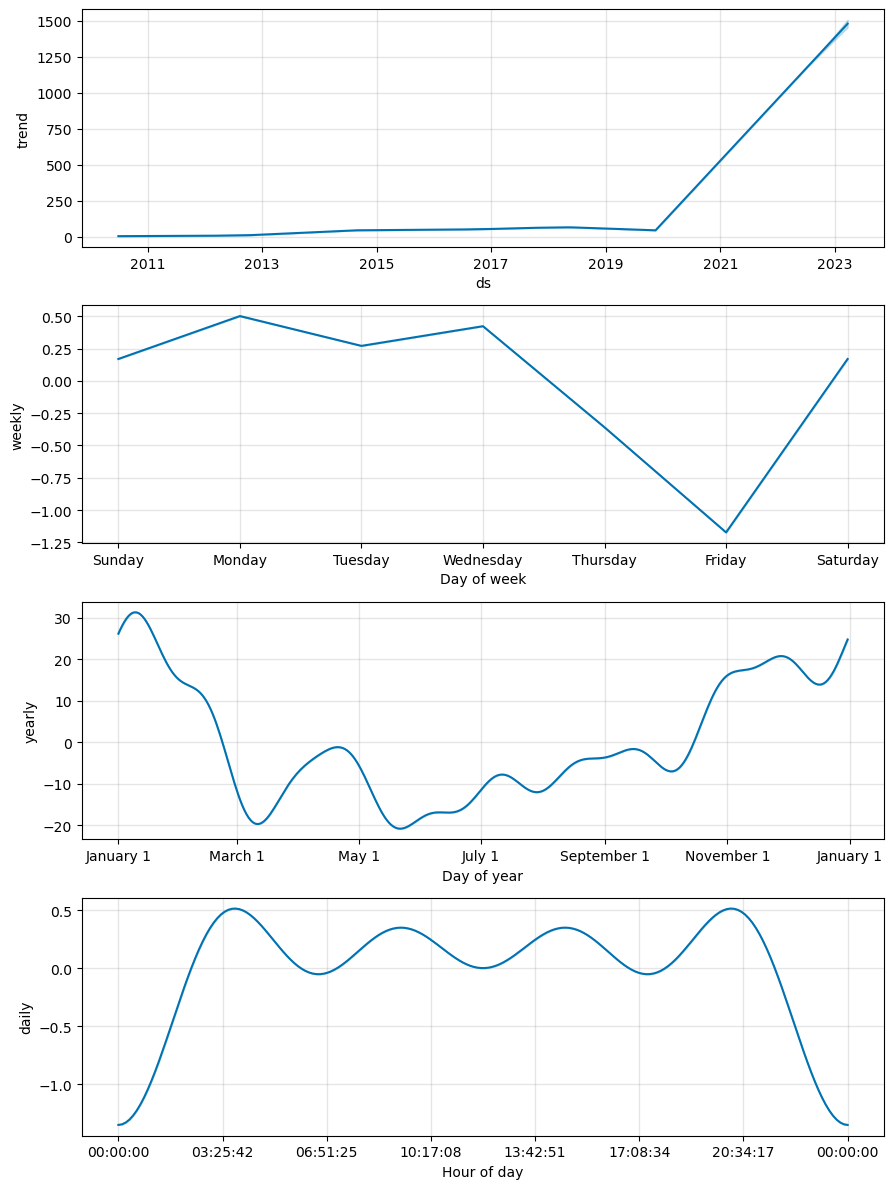

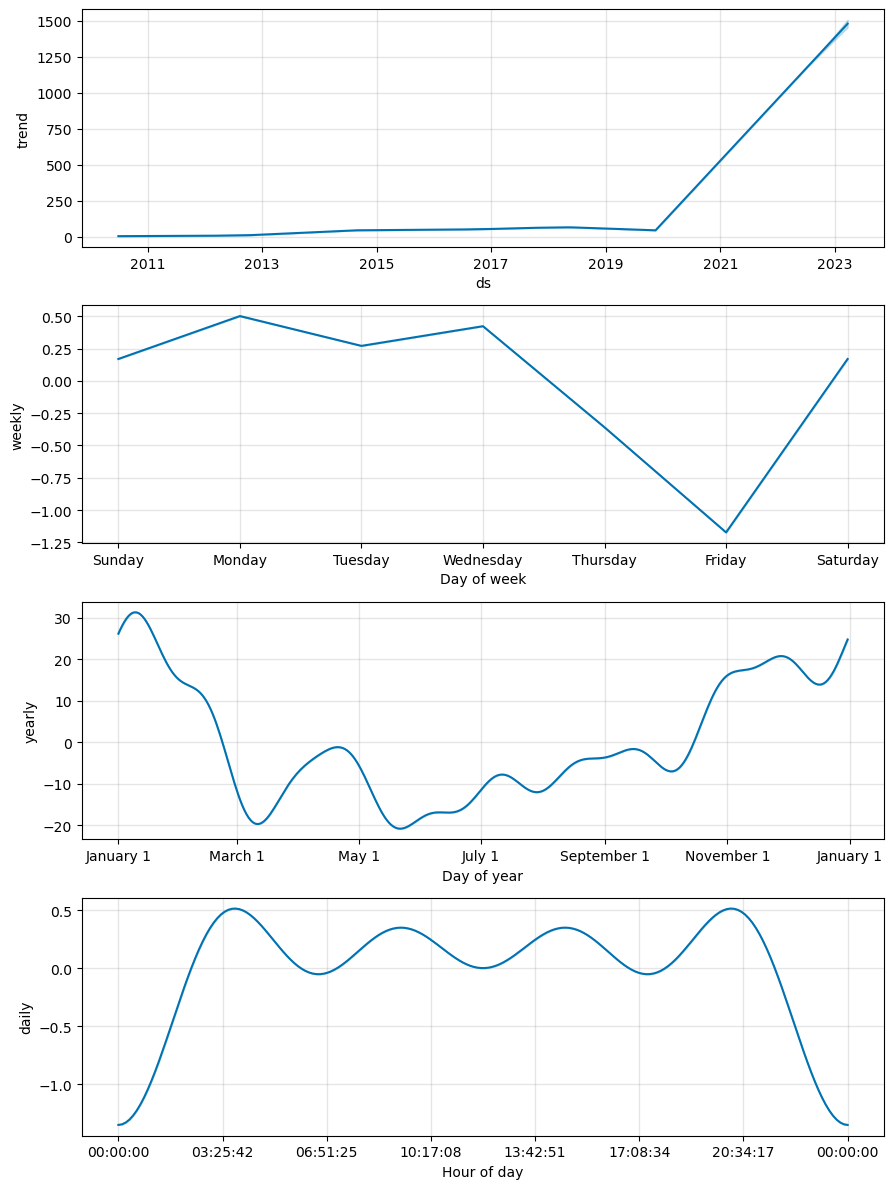

In [23]:
# Initialize the Prophet model 
model =Prophet(daily_seasonality=True) 

# fit the model to the Data 
model.fit(prophet_df) 

#Specify the number of Day for Prediction 
future =model.make_future_dataframe(periods=365)

#use model to make prediction 
forecast =model.predict(future) 

#visulize the forecast 
model.plot(forecast) 
plt.show()

#plot model_components 
model.plot_components(forecast) 

# END